<a href="https://colab.research.google.com/github/armanalam6342/Book-Recommendation-system/blob/main/Book_Recommendation_system.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<b>Project Title : Book Recommendation System
During the last few decades, with the rise of Youtube, Amazon, Netflix, and many other such web services, recommender systems have taken more and more place in our lives. From e-commerce (suggest to buyers articles that could interest them) to online advertisement (suggest to users the right contents, matching their preferences), recommender systems are today unavoidable in our daily online journeys.

In a very general way, recommender systems are algorithms aimed at suggesting relevant items to users (items being movies to watch, text to read, products to buy, or anything else depending on industries).

Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or also be a way to stand out significantly from competitors. The main objective is to create a book recommendation system for users.


**Content**



The Book-Crossing dataset comprises 3 files.


**Users**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.


**Books**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed from the dataset. Moreover, some content-based information is given (Book-Title,Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web Services. Note that in the case of several authors, only the first is provided. URLs linking to cover images are also given, appearing in three different flavors (Image-URL-S, Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the Amazon website.


**Ratings**

Contains the book rating information. Ratings (Book-Rating) are either explicit, expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit, expressed by 0.

#<b> Importing Liabraries

In [118]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors
from PIL import Image
import requests
from io import BytesIO

#<b> Importing Data Frame

In [119]:
books = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Book Recomander system/Books.csv")

In [120]:
users = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Book Recomander system/Users.csv")

In [121]:
ratings = pd.read_csv("/content/drive/MyDrive/ALMABETTER PROJECT/Book Recomander system/Ratings.csv")

#<b> Data preprocessing

##<b> Books Data Frame

In [122]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [123]:
#Shape of Books Data Frame
books.shape

(271360, 8)

In [124]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


In [125]:
# Checking Null Values
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [126]:
# droping Null Values
books.dropna(inplace=True)

In [127]:
# shape of dataframe after droping null values
books.shape

(271354, 8)

In [128]:
# DataFrame columns
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

In [129]:
# Checking Duplicate Data
books.duplicated().sum()

0

In [130]:
# unique publication dates
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'



1.   All the data in object type but year of publication must be in integers
2.   some of 'year of publication' date are 0 so we have to take some action on it
3.  There are some values above 2021 in "year of publication" so we have to take care of these values also.



In [131]:
# converting dtype of Year of publication from object to integer
books['Year-Of-Publication']=books['Year-Of-Publication'].astype("int")

In [132]:
# we have only 13 values above 2021 
books[books['Year-Of-Publication']>2021].value_counts().sum()

13

In [133]:
# droping values above 2021
books=books[books['Year-Of-Publication']<=2021].reset_index(drop=True)

In [134]:
# we have 3570 values with 0
books[books['Year-Of-Publication']==0].value_counts().sum()

4618

In [135]:
# median of books Year-Of-Publication
books['Year-Of-Publication'].median()

1995.0

In [136]:
#replacing 0 with median value of Year-Of-Publication
books['Year-Of-Publication']=books['Year-Of-Publication'].replace(0,1995)

In [137]:
books['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       2021, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897, 1376])

Now look nice

##<b> User DataFrame

In [138]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [139]:
# info
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [140]:
# Shape of DataFrame
users.shape

(278858, 3)

In [141]:
# checking Null Values
users.isna().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [142]:
users.duplicated().sum()

0

##<b> Rating DataFrame

In [143]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [144]:
# shape of data
ratings.shape

(1149780, 3)

In [145]:
# Checking Null Values
ratings.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [146]:
# Checking Duplicate Values
ratings.duplicated().sum()

0

#<b> Data prepration for k-Nearest Neighbour Model

##<b> I will take only those users who rate on minimum 200 books.

##<b> I will consider only those books which are rated by at least 50 users.

In [147]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [148]:
ratings.shape

(1149780, 3)

In [149]:
# so from 278858 users only 105283 user rated the books
ratings['User-ID'].value_counts().shape

(105283,)

Now we Need only those users who rates on atleast 200 books

In [150]:
users_200 = ratings['User-ID'].value_counts()>=200

In [151]:
# here we have 899 users, user_id who rate atleast on 200 books
users_id_200=users_200[users_200].index

In [152]:
users_id_200.shape

(905,)

In [153]:
# New ratings data frame only those people who give ratings atleats on 200 books
ratings_df=ratings[ratings['User-ID'].isin(users_id_200)]

In [154]:
# ratings dataframe shape
ratings_df.shape

(527556, 3)

**We are getting observation from here that 278858 people had rated on 1149780 Books but out of this only 905 people have given rating on 527556 Books** 

This tells us that most people do not rate

That's why we removed them from the data**

In [155]:
# creating new data frame of ratings with books
ratings_with_books = ratings_df.merge(books, on ="ISBN")

In [156]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,3363,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
2,11676,002542730X,6,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
3,12538,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
4,13552,002542730X,0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...


In [157]:
ratings_with_books.shape

(488713, 10)

**Now we have only those books on which at least 200 people have rated**

In [158]:
# Count of ratings on each books
count_of_ratings=ratings_with_books.groupby("Book-Title")["Book-Rating"].count().reset_index()

In [159]:
count_of_ratings.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1


In [160]:
# Renaming the Book-rating column because now its not rating now its count of ratings
count_of_ratings.rename(columns = {"Book-Rating":"count_of_ratings"},inplace= True)

In [161]:
# merging number of rating dataframe with rating with books
rating_df=ratings_with_books.merge(count_of_ratings,on="Book-Title")

In [162]:
# We only consider books that are rated at least 50 times
df=rating_df[rating_df["count_of_ratings"]>=10].reset_index(drop=True)

In [163]:
df.shape

(198010, 11)

**Now we have users who rated at least 200 books and those books which are rated by at least 50 users**

In [164]:
# check duplicates in data
df.duplicated(["User-ID","Book-Title"]).sum()

3730

In [165]:
# droping duplicates
df.drop_duplicates(["User-ID","Book-Title"],inplace=True)

In [166]:
df.shape

(194280, 11)

In [167]:
df.sample(5)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,count_of_ratings
152197,76352,0812571789,0,The Predators,Harold Robbins,1999,Forge,http://images.amazon.com/images/P/0812571789.0...,http://images.amazon.com/images/P/0812571789.0...,http://images.amazon.com/images/P/0812571789.0...,12
62818,3363,0767905199,0,Mr. Maybe,Jane Green,2001,Broadway Books,http://images.amazon.com/images/P/0767905199.0...,http://images.amazon.com/images/P/0767905199.0...,http://images.amazon.com/images/P/0767905199.0...,42
186883,271284,0671760513,0,"Spartacus (Star Trek The Next Generation, No 20)",T.L. Mancour,1992,Star Trek,http://images.amazon.com/images/P/0671760513.0...,http://images.amazon.com/images/P/0671760513.0...,http://images.amazon.com/images/P/0671760513.0...,10
4745,143415,1573226122,0,Lord of the Flies,William Golding,1997,Riverhead Books,http://images.amazon.com/images/P/1573226122.0...,http://images.amazon.com/images/P/1573226122.0...,http://images.amazon.com/images/P/1573226122.0...,120
155952,14422,0688066631,0,Whirlwind,Clavell,1986,Harpercollins,http://images.amazon.com/images/P/0688066631.0...,http://images.amazon.com/images/P/0688066631.0...,http://images.amazon.com/images/P/0688066631.0...,28


#<b> EDA

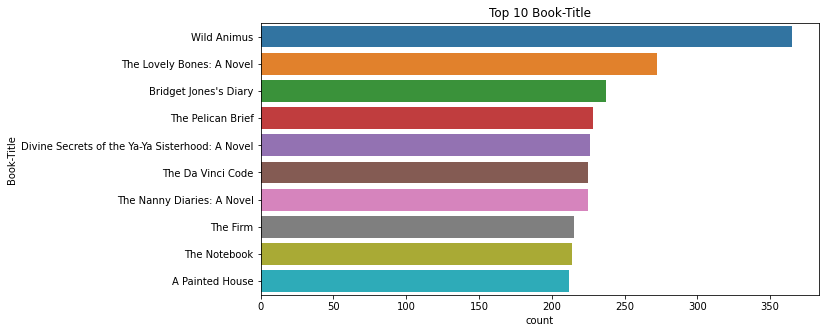

In [168]:
plt.figure(figsize=(10,5))
sns.countplot(y='Book-Title',data=df, order=pd.value_counts(df['Book-Title']).iloc[:10].index)
plt.title('Top 10 Book-Title')
plt.show()



*   The top most book title found is Wild Animus.
*   Selected Poems is present in 350 rows in books data.


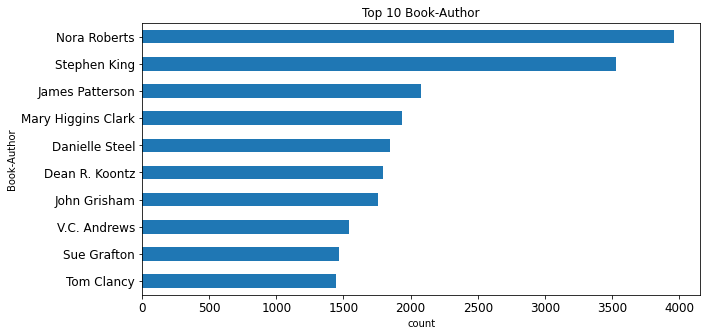

In [169]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Book-Author'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Author', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Author')
plt.show()

*   The top most author found is Stephen King.
*   We have almost 2500 stephen King in books data.

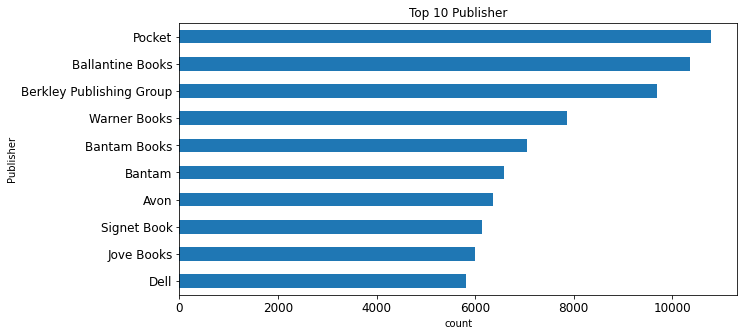

In [170]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ = df['Publisher'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Publisher', fontsize=12)
plt.xlabel('count')
plt.ylabel('Publisher')
plt.show()

*   The top most Publishers found is Ballantine Books.
*   We have above 4000 Ballantine Books in data.

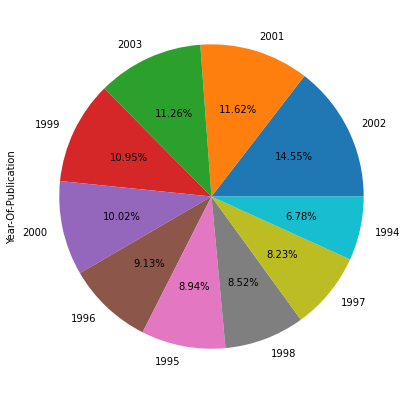

In [171]:
fig= plt.figure(figsize=(15,7))
df['Year-Of-Publication'].value_counts().head(10).plot(kind='pie', autopct='%1.2f%%')
plt.show()

*  Most books were published in the year of 2002.

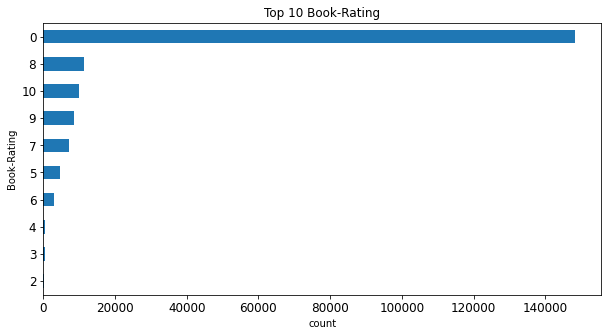

In [172]:
# Checking the ratings.
fig, axes = plt.subplots(1, 1, figsize=(10, 5)) 
_ =df['Book-Rating'].value_counts().head(10).sort_values(ascending=True).plot(kind = 'barh', title='Top 10 Book-Rating', fontsize=12)
plt.xlabel('count')
plt.ylabel('Book-Rating')
plt.show()

*  Highest rating is 8 out of 10.
*  Lowest rating is 1 out of 10.
*  Most of the people haven't given the ratings.

#<b>Collaborative Filtering

Collaborative filtering (CF) is a technique used by recommender systems.In the newer, narrower sense, collaborative filtering is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating).

##<b> Implementing k-Nearest Neighbour
We convert our table to a 2D matrix, and fill the missing values with zeros (since we will calculate distances between rating vectors). We then transform the values(ratings) of the matrix dataframe into a scipy sparse matrix for more efficient calculations.

Finding the Nearest Neighbors We use unsupervised algorithms with sklearn.neighbors. The algorithm we use to compute the nearest neighbors is “auto”, and we specify “metric=minkowski”. Finally, we fit the model.

At first create a pivote table.

In [173]:
# creating pivot table where user-id becomes our columns and book title become our index
book_pivot=df.pivot_table(columns="User-ID",index="Book-Title",values = 'Book-Rating')

In [174]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8890,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,...,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,266866,267635,268030,268032,268110,268330,268622,268932,269566,269719,269728,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Q-Space (Star Trek The Next Generation, Book 47)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
'Salem's Lot,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
01-01-00: The Novel of the Millennium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10 Lb. Penalty,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1001 Ways to Be Romantic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [175]:
# book_pivot shape
book_pivot.shape

(8061, 902)

So we have 888 users and 742 books

In [176]:
# fill Nan values to 0
book_pivot.fillna(0,inplace=True)

In [177]:
book_pivot.head()

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,6323,6543,6563,6575,7158,7286,7346,7915,8067,8245,8681,8890,8936,9856,10447,10819,11601,11676,11993,12538,12824,12982,13082,13273,13552,13850,14422,14521,15408,15418,...,264317,264321,264637,265115,265313,265595,265889,266056,266226,266753,266865,266866,267635,268030,268032,268110,268330,268622,268932,269566,269719,269728,269890,270713,270820,271195,271284,271448,271705,273979,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
"Q-Space (Star Trek The Next Generation, Book 47)",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
01-01-00: The Novel of the Millennium,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10 Lb. Penalty,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001 Ways to Be Romantic,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


##<b>CSR matrix

The compressed sparse row (CSR) or compressed row storage (CRS) or Yale format represents a matrix M by three (one-dimensional) arrays, that respectively contain nonzero values, the extents of rows, and column indices. It is similar to COO, but compresses the row indices, hence the name.

In [178]:
# converting to sparse matrix
books_sparse = csr_matrix(book_pivot)

In [179]:
type(books_sparse)

scipy.sparse.csr.csr_matrix

In [180]:
# storing model in a varible
model =  NearestNeighbors(algorithm="brute") # we change our model to brute 

In [181]:
# fitting our model to book sparse data
model.fit(books_sparse)

NearestNeighbors(algorithm='brute')

In [182]:
# create a function for suggest books by book names
def suggest_books_by_book_names(book_name):
  distances, suggestions = model.kneighbors(book_pivot.loc[book_name,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(book_pivot.index[suggestions[0][0]]))
        book_index_list=books.index[books['Book-Title'] == book_name].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book_name , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))
        book = book_pivot.index[suggestions.flatten()[i]]
        book_ratings= book_pivot.loc[book,:].values.reshape(1,-1).tolist()[0]
        z = []
        for i in book_ratings:
          if i !=0:
            z.append(i)
        
        print('\n Average Rating of Book is ',round(np.mean(z),1))
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()


Your Choice Winter Moon:



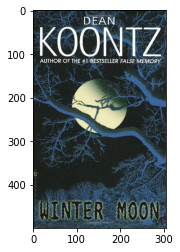


 ******************** Recommendation for  Winter Moon ******************** 

1: The Shoemaker :  The Anatomy of a Psychotic, with distance of 20.85665361461421:

 Average Rating of Book is  7.0


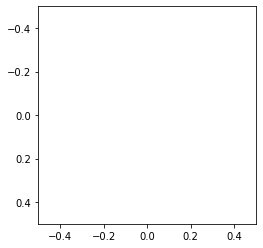

2: A Streetcar Named Expire (Bed-And-Breakfast Mysteries (Paperback)), with distance of 20.8806130178211:

 Average Rating of Book is  6.5


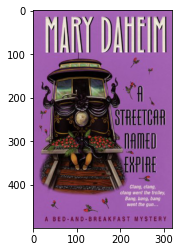

3: The Fourth Protocol, with distance of 20.8806130178211:

 Average Rating of Book is  6.5


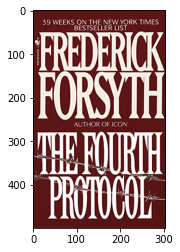

4: In the Presence of Enemies, with distance of 20.952326839756964:

 Average Rating of Book is  6.0


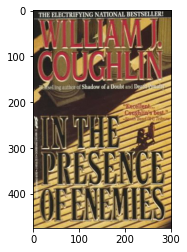

5: Invasion of Privacy, with distance of 21.633307652783937:

 Average Rating of Book is  6.3


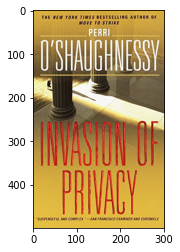

In [183]:
# call function for recommendation
suggest_books_by_book_names('Winter Moon')

In [184]:
# create a function for predict books by index number
def suggest_books_by_index(index_number):
  distances, suggestions = model.kneighbors(book_pivot.iloc[index_number,:].values.reshape(1,-1), n_neighbors = 6)
  for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Your Choice {0}:\n'.format(book_pivot.index[suggestions[0][0]]))
        book = book_pivot.index[suggestions[0][0]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()
        print('\n','*'*20, "Recommendation for ", book , '*'*20,'\n')

    else:
        print('{0}: {1}, with distance of {2}:'.format(i, book_pivot.index[suggestions.flatten()[i]], distances.flatten()[i]))

        book = book_pivot.index[suggestions.flatten()[i]]
        book_index_list=books.index[books['Book-Title'] == book].tolist()
        book_index = book_index_list[0]
        book_ratings= book_pivot.loc[book,:].values.reshape(1,-1).tolist()[0]
        z = []
        for i in book_ratings:
          if i !=0:
            z.append(i)
        
        print('\n Average Rating of Book is ',round(np.mean(z),1))

        url = books['Image-URL-L'][book_index]
        response = requests.get(url)
        img = Image.open(BytesIO(response.content))
        plt.imshow(img)
        plt.show()


Your Choice A Streetcar Named Desire:



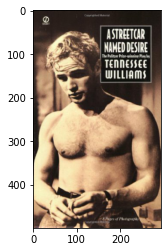


 ******************** Recommendation for  A Streetcar Named Desire ******************** 

1: Killing Time: A Novel of the Future, with distance of 21.095023109728988:

 Average Rating of Book is  6.0


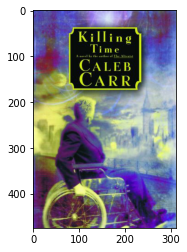

2: Tyrant's Test (Star Wars: The Black Fleet Crisis, Book 3), with distance of 21.37755832643195:

 Average Rating of Book is  4.0


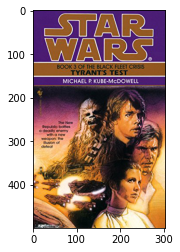

3: Anna Karenina (Signet Classics (Paperback)), with distance of 21.447610589527216:

 Average Rating of Book is  5.0


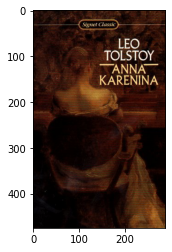

4: A Farewell to Arms (A Scribner Classic), with distance of 22.090722034374522:

 Average Rating of Book is  6.3


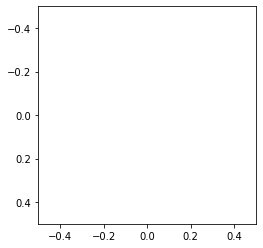

5: As I Lay Dying: The Corrected Text (Vintage International), with distance of 22.135943621178654:

 Average Rating of Book is  7.5


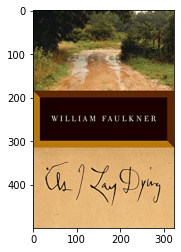

In [185]:
# call function for recommendation
suggest_books_by_index(237)

#<b>Data Prepration for  SVD - Model Based Collaborative Filtering

##<b> I am Considering only those ratings that are not equal to 0

In [186]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [187]:
ratings.shape

(1149780, 3)

In [188]:
# Droping ratings that are 0
ratings_df=ratings[ratings["Book-Rating"]!=0]

In [189]:
ratings_df.shape

(433671, 3)

**After Droping 0 ratings our data contains only 433671 rows**

In [190]:
ratings_df.sample(5)

,User-ID,ISBN,Book-Rating
650737,157273,0786889322,9
553278,132930,0701167130,7
281388,66942,0099218518,9
1055471,252007,0552137030,10
720696,174304,0671759345,8


##<b> Filtering users with atleast 20 interaction

In [191]:
r_u = pd.DataFrame(ratings_df['User-ID'].value_counts().reset_index())
r_u.columns = ['User-ID', 'user_count']


# merge 'df' & 'brands_count'
ratings_df_count = pd.merge(ratings_df, r_u, on='User-ID')

In [192]:
ratings_df_count.head()

,User-ID,ISBN,Book-Rating,user_count
0,276726,0155061224,5,1
1,276729,052165615X,3,2
2,276729,0521795028,6,2
3,276736,3257224281,8,1
4,276737,0600570967,6,1


In [193]:
isbn_rating_count=ratings_df_count.groupby("ISBN")["Book-Rating"].count().reset_index()

In [194]:
isbn_rating_count=isbn_rating_count.rename(columns={'Book-Rating':'count_isbn_rating'})

In [195]:
ratings_df_count = pd.merge(ratings_df_count, isbn_rating_count, on='ISBN')

In [196]:
ratings_df_count.head()

,User-ID,ISBN,Book-Rating,user_count,count_isbn_rating
0,276726,0155061224,5,1,1
1,276729,052165615X,3,2,1
2,276729,0521795028,6,2,1
3,276736,3257224281,8,1,4
4,86583,3257224281,6,18,4


In [197]:
interactions_from_selected_users_df=ratings_df_count[(ratings_df_count['user_count'] >= 20) & (ratings_df_count['count_isbn_rating'] >= 20)].reset_index(drop=True)


In [198]:
interactions_from_selected_users_df.drop(columns=['user_count','count_isbn_rating'],inplace=True) 

In [199]:
r_u = pd.DataFrame(interactions_from_selected_users_df['User-ID'].value_counts().reset_index())
r_u.columns = ['User-ID', 'user_count']


# merge 'df' & 'brands_count'
interactions_from_selected_users_df = pd.merge(interactions_from_selected_users_df, r_u, on='User-ID')

In [200]:
interactions_from_selected_users_df=interactions_from_selected_users_df[interactions_from_selected_users_df['user_count']!=1]

In [201]:
interactions_from_selected_users_df.drop(columns=['user_count'],inplace=True) 

In [202]:
# users_interactions_count_df = ratings_df.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
# print('Number of users: %d' % len(users_interactions_count_df))

# users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 20].reset_index()[['User-ID']]
# print('Number of users with at least 20 interactions: %d' % len(users_with_enough_interactions_df))

In [203]:
# print('Number of interactions: %d' % len(ratings_df))
# interactions_from_selected_users_df = ratings_df.merge(users_with_enough_interactions_df, 
#                how = 'right',
#                left_on = 'User-ID',
#                right_on = 'User-ID')
# print('Number of interactions from users with at least 20 interactions: %d' % len(interactions_from_selected_users_df))

In [204]:
# ratings_interactions_count_df = ratings_df.groupby(['User-ID', 'ISBN']).size().groupby('ISBN').size()
# print('Number of users: %d' % len(ratings_interactions_count_df))

# ratings_with_enough_interactions_df = ratings_interactions_count_df[ratings_interactions_count_df >= 20].reset_index()[['ISBN']]
# print('Number of users with at least 20 interactions: %d' % len(ratings_with_enough_interactions_df))

In [205]:
# print('Number of interactions: %d' % len(ratings_df))
# interactions_from_selected_users_df = interactions_from_selected_users_df.merge(ratings_with_enough_interactions_df, 
#                how = 'right',
#                left_on = 'ISBN',
#                right_on = 'ISBN')
# print('Number of interactions from users with at least 20 interactions: %d' % len(interactions_from_selected_users_df))

In [206]:
# interactions_from_selected_users_df.dropna(inplace=True)

##<b>We are applying log transformation to smooth the distribution!!

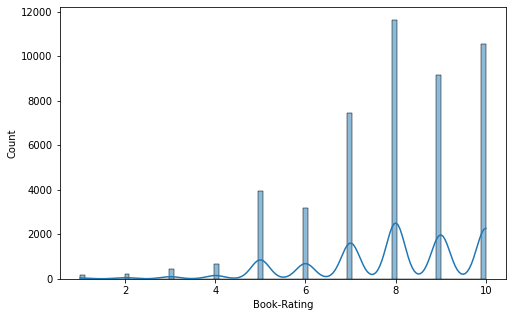

In [207]:
# Before log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [208]:
import math
def smooth_user_preference(x):
    return math.log(1+x, 2)
    
interactions_full_df = interactions_from_selected_users_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('Number of unique user/item interactions: %d' % len(interactions_full_df))
interactions_full_df.sample(5)

Number of unique user/item interactions: 47373


,ISBN,User-ID,Book-Rating
16948,0385505833,114368,3.459432
22145,0440212561,140080,3.459432
47332,3548359698,182345,3.459432
43073,0770422632,51803,3.169925
5377,031205436X,74665,3.169925


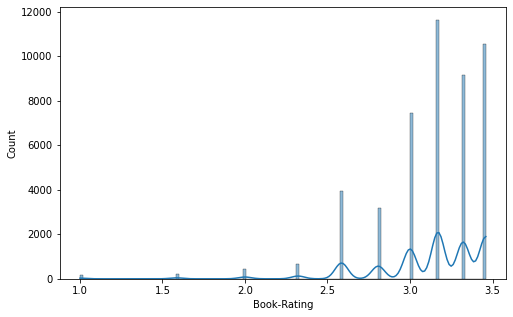

In [209]:
# After log transformation
plt.figure(figsize=(8, 5))
sns.histplot(interactions_full_df.groupby(['ISBN', 'User-ID'])['Book-Rating'].sum(), kde=True)
plt.show()

In [210]:
interactions_full_df.head()

,ISBN,User-ID,Book-Rating
0,000649840X,11676,3.169925
1,000649840X,32440,3.169925
2,000649840X,69405,2.584963
3,000649840X,70052,2.000000
4,000649840X,76350,3.000000


In [211]:
from sklearn.model_selection import train_test_split

interactions_train_df, interactions_test_df = train_test_split(interactions_full_df,
                                   stratify=interactions_full_df['User-ID'], 
                                   test_size=0.20,
                                   random_state=42)

print('Number interactions on Train set: %d' % len(interactions_train_df))
print('Number interactions on Test set: %d' % len(interactions_test_df))

Number interactions on Train set: 37898
Number interactions on Test set: 9475


In [212]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = interactions_train_df.pivot(index='User-ID', 
                                                          columns='ISBN', 
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,000649840X,0007110928,0020199600,0020442203,002542730X,0028604199,006000438X,0060008032,0060008776,006001203X,0060083948,0060085452,0060090367,0060096195,0060168013,006016848X,0060173289,0060175400,0060175966,0060188731,0060194448,006019491X,0060198133,0060199652,0060248025,0060256656,0060256672,0060256737,0060391448,0060391626,0060392452,0060502258,0060505885,0060512806,0060512822,0060517794,0060740450,0060809833,0060830956,0060914653,...,1853261580,1857022424,1860492592,1878424114,1878424319,1880418568,193156146X,1931561648,2070360024,2253044903,2253063339,2253150711,2290311782,3150000017,325722575X,3257227809,3257228007,3257229534,3379015180,3404118960,3404148665,3423202327,3423202947,3423204206,3426029553,3442092981,3442437407,3442541751,3492045170,3548359698,3596150655,3596259924,3746614007,8408043641,8445071416,8495618605,8806142100,8807813025,8845205118,8873122933
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
254,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [213]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [214]:

# Check the list of user id of the users
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[254, 507, 638, 643, 651, 709, 805, 882, 929, 1025]

In [215]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [216]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [217]:
users_items_pivot_matrix.shape

(3167, 2178)

In [218]:
U.shape

(3167, 15)

In [219]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [220]:
Vt.shape

(15, 2178)


**After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.**

In [221]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
all_user_predicted_ratings

array([[ 3.48983421e-03,  8.70706793e-03, -1.17291849e-02, ...,
        -3.07324879e-03,  2.49959627e-04, -3.33832513e-05],
       [ 4.31439239e-03, -1.27546310e-04, -5.48127733e-04, ...,
        -5.52995740e-03,  1.01750578e-04,  7.12554425e-05],
       [ 2.74019638e-02,  2.95377835e-02,  5.58942008e-02, ...,
         2.33298349e-02, -2.88546995e-04,  2.30637533e-04],
       ...,
       [ 1.36033171e-02, -1.81135528e-02,  4.68840167e-03, ...,
        -2.18653971e-02,  2.18247966e-04, -4.19492052e-05],
       [-3.34969835e-05, -1.13743859e-02,  3.79546882e-03, ...,
        -7.21423747e-03, -7.32411634e-05,  2.09429013e-04],
       [ 2.20855927e-03,  9.79179878e-03,  3.46190476e-03, ...,
         1.05468367e-02, -2.87264899e-05,  1.71309695e-05]])

In [222]:
all_user_predicted_ratings.shape

(3167, 2178)

**Making DataFrame from our predicted ratings.**

In [223]:
#Converting the reconstructed matrix back to a Pandas dataframe
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,254,507,638,643,651,709,805,882,929,1025,1131,1211,1248,1424,1435,1674,1733,1848,1903,2030,2033,2110,2179,2276,2313,2766,2891,2977,3167,3282,3346,3363,3371,3373,3556,3827,3917,3923,4017,4157,...,274549,274634,274656,274803,274808,275020,275111,275154,275220,275276,275383,275922,275970,276018,276050,276165,276231,276307,276463,276521,276641,276670,276680,276688,277157,277427,277478,277523,277639,277965,278026,278137,278188,278202,278221,278356,278418,278582,278633,278843
ISBN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
000649840X,0.003490,0.004314,0.027402,0.002424,-0.000483,0.015191,0.009051,0.008488,0.001850,0.006399,0.001128,0.004786,0.001261,0.006382,0.002790,0.003055,-0.001835,0.007731,0.001585,0.000860,-0.011718,-0.000971,0.001123,-0.003573,0.003633,0.050062,0.016915,0.007350,0.006141,-0.000496,0.026043,0.001935,-0.003412,0.001142,-0.000421,0.005173,0.003376,0.006083,0.074651,-0.000386,...,0.000984,-0.006299,0.001646,0.000503,0.010018,-0.000485,0.002047,0.003587,0.000741,0.000761,0.001497,0.005260,0.010156,0.000049,0.019339,-0.014262,-0.001282,0.002262,0.005509,0.001461,0.002322,0.024002,0.030864,0.001463,-0.000688,0.012369,0.001952,-0.003745,-0.010270,0.001826,0.006525,0.001329,-0.001008,-0.001834,0.001745,-0.007299,-0.002028,0.013603,-0.000033,0.002209
0007110928,0.008707,-0.000128,0.029538,0.009983,0.008796,-0.002119,0.008100,0.040603,0.008764,0.005033,-0.016745,0.014495,0.011865,0.012734,0.014447,0.013287,0.002573,0.024016,0.007854,0.002037,-0.025370,-0.004356,0.011721,0.028699,0.004146,0.039202,0.005645,-0.007657,0.020888,-0.001306,-0.003721,0.007063,0.011522,0.009571,0.009414,-0.000552,0.004288,0.002833,0.036787,-0.006660,...,0.016148,0.003131,0.002148,0.000833,0.018587,-0.007580,0.012742,0.028263,0.002872,0.005326,0.005682,0.004010,0.038853,0.000224,0.008156,-0.009711,0.017877,0.006625,0.002655,0.008598,0.020792,-0.004681,0.019938,0.004268,0.013440,0.039815,0.004929,0.013945,-0.003325,-0.004509,0.016569,0.002050,0.007835,0.003324,-0.000317,-0.011384,0.010051,-0.018114,-0.011374,0.009792
0020199600,-0.011729,-0.000548,0.055894,0.001673,0.000580,0.018312,0.001296,0.030504,0.001613,-0.000359,-0.003094,0.021860,-0.000510,-0.005591,0.005317,0.003910,0.005986,0.004147,0.001635,-0.001747,0.001195,-0.007857,0.024968,0.008662,0.003141,0.044745,-0.004340,0.010122,0.013738,0.001427,0.031586,-0.003813,0.007783,0.007725,0.027527,0.000397,0.001606,0.002950,0.057386,0.007757,...,0.006180,-0.009826,-0.004441,0.000432,-0.001570,-0.003722,0.001049,0.018814,0.002401,-0.000131,0.001620,-0.001726,-0.000483,0.000016,0.016789,0.030318,0.022187,0.004230,0.004521,0.002579,0.004270,0.032382,0.050852,0.000013,0.002973,0.050116,-0.000054,0.007448,0.005256,-0.005183,0.008419,-0.003798,0.005679,0.000099,-0.000066,-0.009910,0.007305,0.004688,0.003795,0.003462
0020442203,0.083816,0.001646,0.001375,0.000578,-0.000476,0.002872,0.008442,0.002947,0.001364,0.006373,0.009146,-0.004703,0.000566,0.009023,0.006778,0.002106,-0.001144,0.010434,0.002161,0.003834,0.073288,0.011513,0.011948,-0.002654,0.002051,0.016392,0.012539,0.007679,-0.001437,-0.000141,0.007140,0.009622,0.000938,0.002937,-0.005837,-0.007798,0.003159,0.007467,0.049336,0.002323,...,-0.001769,0.005476,0.009108,0.000020,0.008260,-0.000784,0.000690,0.001662,-0.000322,0.003137,0.000651,0.004383,0.010198,0.000006,0.018131,0.076997,-0.004023,0.003061,0.007990,-0.000083,-0.000016,0.004338,0.010039,0.001474,-0.001393,-0.006276,-0.000026,-0.004876,-0.007031,0.011173,-0.001375,0.006569,-0.001858,-0.000858,0.001262,0.030869,-0.001421,0.003872,0.009239,0.005975
002542730X,0.123791,0.002227,0.080729,0.013112,0.008256,0.018612,0.031543,0.076909,0.013165,0.016971,0.000153,0.034353,0.012410,0.027055,0.031138,0.021781,-0.003887,0.049258,0.015084,0.006648,0.076792,0.013028,0.057619,0.020420,0.011883,0.102987,0.034790,0.017868,0.041611,-0.001276,0.032525,0.015784,0.012158,0.024574,0.033212,0.013366,0.011924,0.020198,0.172489,0.004042,...,0.014587,0.007774,0.014028,0.001537,

In [224]:
book_df = books.copy()

In [225]:
class CFRecommender:
    
    MODEL_NAME = 'Collaborative Filtering'
    
    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df
        
    def get_model_name(self):
        return self.MODEL_NAME
        
    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(book_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [226]:
#Indexing by personId to speed up the searches during evaluation
interactions_full_indexed_df = interactions_full_df.set_index('User-ID')
interactions_train_indexed_df = interactions_train_df.set_index('User-ID')
interactions_test_indexed_df = interactions_test_df.set_index('User-ID')

In [227]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [228]:
import random

In [229]:
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings_df_count['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):
      person_metrics = self.evaluate_model_for_user(model, userid)  
      return

model_recommender = ModelRecommender()

In [230]:
print(list(interactions_full_indexed_df.index.values))

[11676, 32440, 69405, 70052, 76350, 81855, 86243, 114279, 120080, 140000, 148258, 149908, 159863, 164096, 262902, 11676, 23902, 92853, 100088, 107301, 170184, 10030, 62891, 101876, 125928, 160558, 176459, 197364, 216683, 217056, 227447, 235105, 275220, 16634, 47779, 55492, 96448, 114414, 122429, 152946, 164096, 173291, 197687, 203240, 213066, 228998, 229768, 233445, 8019, 10030, 11676, 12538, 16996, 41084, 52584, 71712, 80538, 86243, 89551, 104058, 105108, 110934, 113270, 113752, 119725, 128835, 150979, 152946, 164096, 171602, 173291, 174216, 179734, 183995, 202963, 208671, 209516, 213760, 225763, 229741, 234597, 235498, 243720, 244277, 259264, 262902, 269566, 277427, 7346, 52584, 59656, 76223, 78973, 105108, 113752, 135703, 143134, 150979, 152946, 155147, 249894, 250300, 266466, 268833, 272482, 4017, 6242, 6575, 8454, 10560, 11676, 17003, 89602, 104113, 115435, 124747, 143011, 143715, 147678, 148258, 149908, 201042, 203044, 224349, 259626, 263877, 11676, 44845, 81682, 83646, 93426, 98

In [231]:
user=int(input("Enter User ID from above list for book recommendation:  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation:  120080
Recommendation for User-ID =  120080
         ISBN                                         Book-Title  recStrength
0  0446310786                              To Kill a Mockingbird     0.022619
1  0316666343                          The Lovely Bones: A Novel     0.017480
2  0385504209                                  The Da Vinci Code     0.015701
3  0156027321                                         Life of Pi     0.015034
4  0553280341  B Is for Burglar (Kinsey Millhone Mysteries (P...     0.014507
5  0553284789  F Is for Fugitive (Kinsey Millhone Mysteries (...     0.012222
6  0451526341                                        Animal Farm     0.011540
7  0449219364  G Is for Gumshoe (Kinsey Millhone Mysteries (P...     0.011163
8  0553280368  C Is for Corpse (Kinsey Millhone Mysteries (Pa...     0.011012
9  0553279556  E Is for Evidence: A Kinsey Millhone Mystery (...     0.010503


In [232]:
76#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, interactions_full_indexed_df)
        all_items = set(ratings['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(non_interacted_items, sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):        
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index
    
    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):
        
        # Getting the items in test set
        interacted_values_testset = interactions_test_indexed_df.loc[person_id]
        
        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([str(interacted_values_testset['ISBN'])])
            
        interacted_items_count_testset = len(person_interacted_items_testset) 

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, interactions_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0
        hits_at_15_count = 0
        
        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:
            
            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(person_id, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)    #%(2**32))

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]                    
            valid_recs = valid_recs_df['ISBN'].values
            
            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10
            hit_at_15, index_at_15 = self._verify_hit_top_n(item_id, valid_recs, 15)
            hits_at_15_count += hit_at_15

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)
        recall_at_15 = hits_at_15_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count, 
                          'hits@10_count':hits_at_10_count, 
                          'hits@15_count':hits_at_15_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10,
                          'recall@15': recall_at_15}
        return person_metrics

    
    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):
        
        people_metrics = []
        
        for idx, person_id in enumerate(list(interactions_test_indexed_df.index.unique().values)):    
            person_metrics = self.evaluate_model_for_user(model, person_id)  
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)
            
        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)
        
        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_15 = detailed_results_df['hits@15_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        
        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10,
                          'recall@15': global_recall_at_15}    
        return global_metrics, detailed_results_df
    
model_evaluator = ModelEvaluator()
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10)

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
2909 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.982796833773087, 'recall@10': 0.982796833773087, 'recall@15': 0.982796833773087}


,hits@5_count,hits@10_count,hits@15_count,interacted_count,recall@5,recall@10,recall@15,User-ID
25,203,203,203,206,0.985437,0.985437,0.985437,11676
248,47,47,47,47,1.000000,1.000000,1.000000,16795
40,40,40,40,40,1.000000,1.000000,1.000000,95359
1052,33,33,33,33,1.000000,1.000000,1.000000,104636
258,28,28,28,28,1.000000,1.000000,1.000000,153662
444,27,27,27,28,0.964286,0.964286,0.964286,60244
494,26,26,26,26,1.000000,1.000000,1.000000,158295
568,24,24,24,24,1.000000,1.000000,1.000000,114368
83,23,23,23,23,1.000000,1.000000,1.000000,89602
138,23,23,23,23,1.000000,1.000000,1.000000,258534
